In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import plotly.offline as pyoff
import plotly.graph_objs as go

import datetime as dt
import feature_engine

from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('dataa.csv',  encoding='unicode_escape')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [479]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [480]:
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [481]:
df.Country.value_counts(normalize=True) 

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

In [482]:
df.InvoiceDate.value_counts(normalize=True) 

InvoiceDate
10/31/2011 14:41    0.002056
12/8/2011 9:28      0.001382
12/9/2011 10:03     0.001349
12/5/2011 17:24     0.001330
6/29/2011 15:58     0.001301
                      ...   
9/28/2011 9:57      0.000002
9/28/2011 9:45      0.000002
3/16/2011 12:13     0.000002
3/16/2011 12:22     0.000002
3/16/2011 15:58     0.000002
Name: proportion, Length: 23260, dtype: float64

In [483]:
df = df[df.Country == 'United Kingdom']

df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]

#Removing the Null values from the data.
df = df[pd.notnull(df['CustomerID'])]

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

#df['Date']=pd.to_datetime(df['Date'])

df.isnull().mean()

InvoiceNo           0.0
StockCode           0.0
Description         0.0
Quantity            0.0
InvoiceDate         0.0
UnitPrice           0.0
CustomerID          0.0
Country             0.0
InvoiceYearMonth    0.0
Date                0.0
dtype: float64

In [484]:
df_agg= df.groupby("Date").Quantity.sum()
df_agg

Date
2010-12    267767
2011-01    278251
2011-02    213375
2011-03    276304
2011-04    260448
2011-05    301824
2011-06    280974
2011-07    303601
2011-08    310831
2011-09    454559
2011-10    476984
2011-11    571215
2011-12    260607
Name: Quantity, dtype: int64

In [485]:
#converting series to dataframe and resetting index, and changing the column name to 'Orders'
df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,Date,Quantity
0,2010-12,267767
1,2011-01,278251
2,2011-02,213375
3,2011-03,276304
4,2011-04,260448


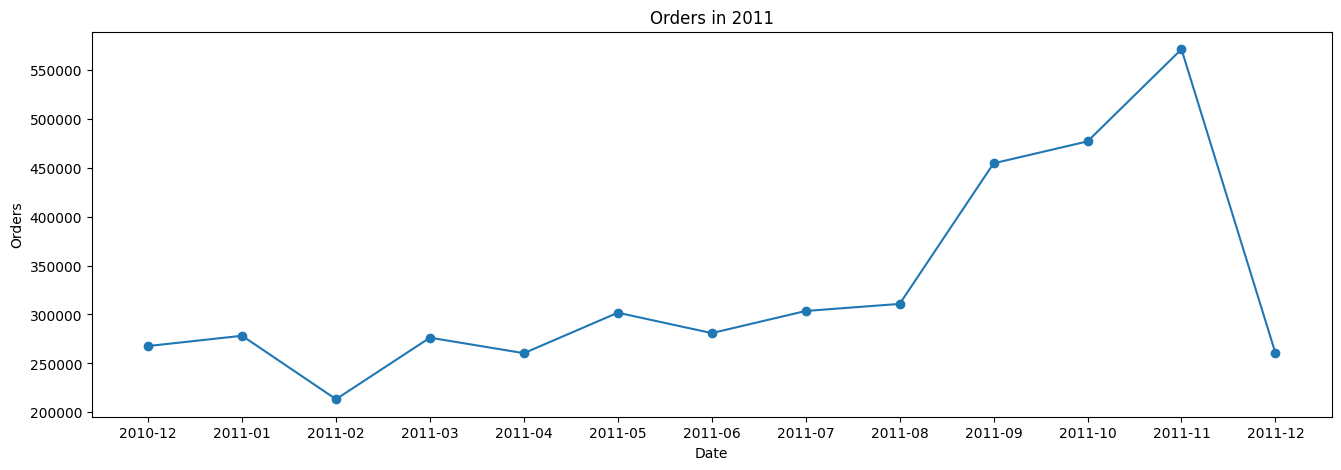

In [486]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

In [487]:
df['Revenue'] = df['Quantity']*df['UnitPrice']


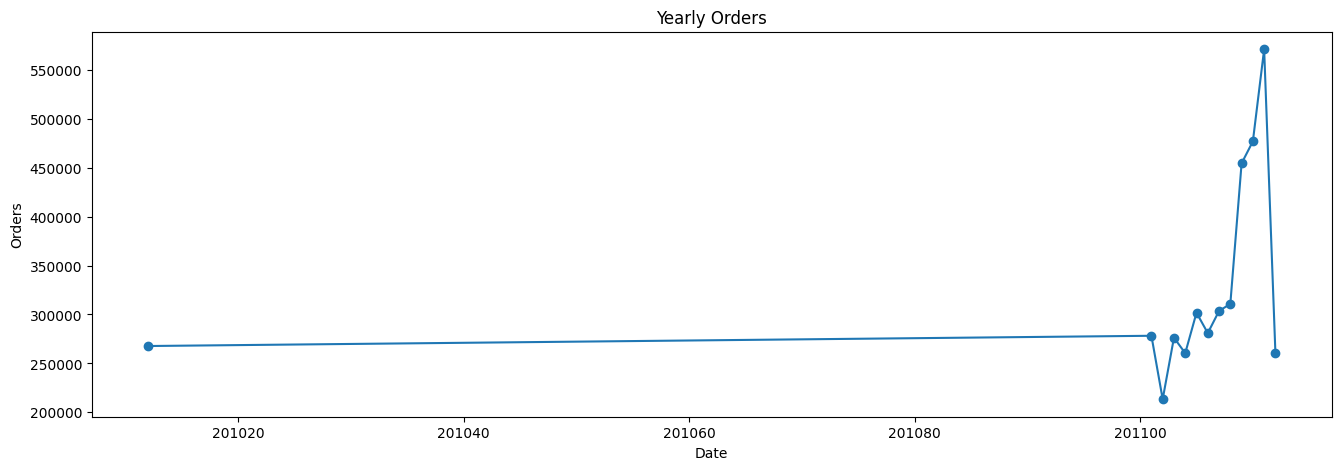

In [488]:
# Finding the total number of orders for each year by grouping the data by years
df_yearly_orders = df.groupby(df['InvoiceYearMonth'])['Quantity'].sum().reset_index()

plot_df(df_yearly_orders, x=df_yearly_orders['InvoiceYearMonth'], y=df_yearly_orders['Quantity'], title='Yearly Orders')


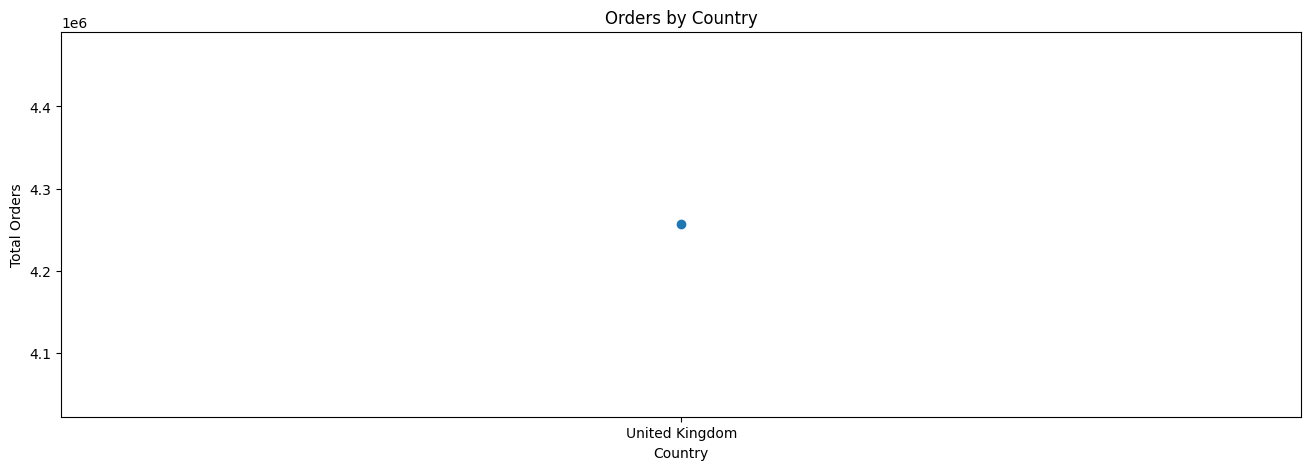

In [489]:
# Finding the total number of orders for each country by grouping data by country
df_country_orders = df.groupby('Country')['Quantity'].sum().reset_index()

# Plot the chart
plot_df(df_country_orders, x=df_country_orders['Country'], y=df_country_orders['Quantity'], title='Orders by Country', xlabel='Country', ylabel='Total Orders')


In [490]:
df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
#df_revenue.tail()

plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

En çok sipariş verilen saat aralığı: 12.00 - 13.00


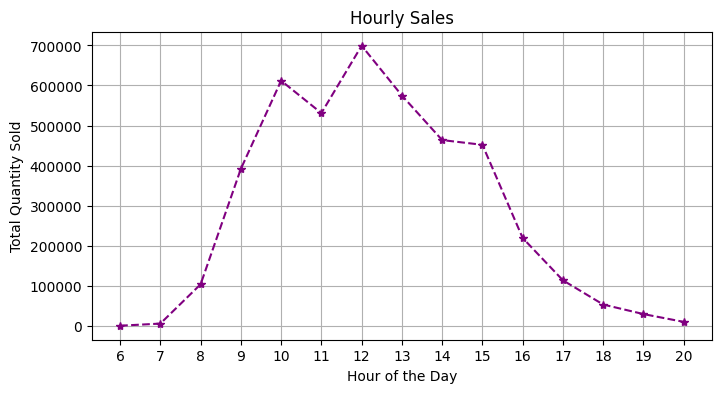

In [491]:
import matplotlib.pyplot as plt

df['Hour'] = df['InvoiceDate'].dt.hour

# Finding the total order quantity within a certain time period
hourly_sales = df.groupby('Hour')['Quantity'].sum()
most_ordered_hour = hourly_sales.idxmax()

# Most ordered time range
start_hour = most_ordered_hour
end_hour = most_ordered_hour + 1 if most_ordered_hour != 23 else 0 # Hour after 23 returns to 0

print(f"En çok sipariş verilen saat aralığı: {start_hour:02}.00 - {end_hour:02}.00")

# Creating graphics
plt.figure(figsize=(8, 4))
plt.plot(hourly_sales.index, hourly_sales.values, marker='*', linestyle='--', color='purple')
plt.title('Hourly Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.show()



In [492]:
NOW = dt.date(2011,12,9) 
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [493]:
FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4595,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [494]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [495]:
(NOW - dt.date(2011,1,18)).days == 325


True

In [496]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

segmented_rfm = RFM_Table.copy()

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [497]:
segmented_rfm['RFM'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM
0,12346.0,325,1,77183.60,4,4,1,44
1,12747.0,2,103,4196.01,1,1,1,11
2,12748.0,0,4595,33719.73,1,1,1,11
3,12749.0,3,199,4090.88,1,1,1,11
4,12820.0,3,59,942.34,1,2,2,12


In [498]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile']].sum(axis=1)
segmented_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,44,8
1,12747.0,2,103,4196.01,1,1,1,11,2
2,12748.0,0,4595,33719.73,1,1,1,11,2
3,12749.0,3,199,4090.88,1,1,1,11,2
4,12820.0,3,59,942.34,1,2,2,12,3
5,12821.0,214,6,92.72,4,4,4,44,8
6,12822.0,70,46,948.88,3,2,2,32,5
7,12823.0,74,5,1759.50,3,4,1,34,7
8,12824.0,59,25,397.12,3,3,3,33,6
9,12826.0,2,91,1474.72,1,2,2,12,3


In [499]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

segmented_rfm['RFM_Segment'] = segmented_rfm['RFM'].replace(seg_map, regex=True)

segmented_rfm.reset_index(drop=True)
segmented_rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM,RFM_Score,RFM_Segment
0,12346.0,325,1,77183.60,4,4,1,44,8,loyal_customers
1,12747.0,2,103,4196.01,1,1,1,11,2,hibernating
2,12748.0,0,4595,33719.73,1,1,1,11,2,hibernating
3,12749.0,3,199,4090.88,1,1,1,11,2,hibernating
4,12820.0,3,59,942.34,1,2,2,12,3,hibernating
5,12821.0,214,6,92.72,4,4,4,44,8,loyal_customers
6,12822.0,70,46,948.88,3,2,2,32,5,about_to_sleep
7,12823.0,74,5,1759.50,3,4,1,34,7,loyal_customers
8,12824.0,59,25,397.12,3,3,3,33,6,need_attention
9,12826.0,2,91,1474.72,1,2,2,12,3,hibernating


In [500]:
# Merge RFM_Table containing Recency, Frequency, Monetary values with CustomerID and fill in NaN values
df = df.merge(RFM_Table[['CustomerID', 'Recency', 'Frequency', 'Monetary']], on='CustomerID', how='left').fillna(0)

# Merge by adding R_quartile, F_quartile, M_quartile, RFM_Score and RFM_Segment values and filling in NaN values
df = df.merge(segmented_rfm[['CustomerID', 'R_quartile', 'F_quartile', 'M_quartile', 'RFM', 'RFM_Score', 'RFM_Segment']], on='CustomerID', how='left').fillna(0)


In [501]:
# Save updated dataset to CSV record
df.to_csv('data_plus.csv', index=False)

In [502]:
# Calculating how many customers each segment corresponds to
segment_counts = segmented_rfm['RFM_Segment'].value_counts()

# Print the number of each segment
for segment, count in segment_counts.items():
    print(f"{segment}: {count} customers")


hibernating: 1345 customers
loyal_customers: 766 customers
at_Risk: 627 customers
potential_loyalists: 458 customers
about_to_sleep: 405 customers
need_attention: 276 customers
promising: 43 customers


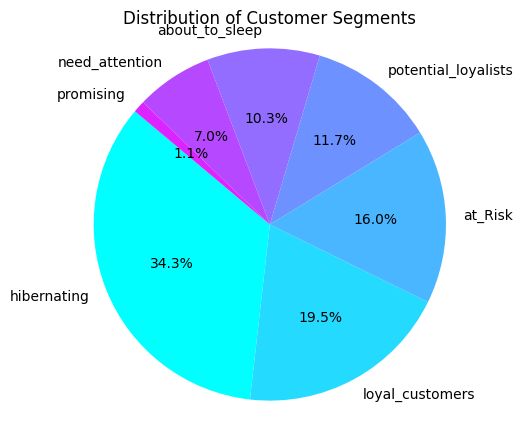

In [503]:
import matplotlib.pyplot as plt
from matplotlib import colors

# Create color gradient
num_colors = len(segment_counts)
color_map = plt.get_cmap('cool')  # Color map selection
color_gradient = [color_map(i / num_colors) for i in range(num_colors)]

# Pie chart drawing
plt.figure(figsize=(5, 5))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=color_gradient)
plt.title('Distribution of Customer Segments')
plt.axis('equal')  
plt.show()

In [504]:
segmented_rfm['RFM_Score'].unique()
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
2             6.9     327.5   6825.0   507
3            20.0     142.2   2531.9   541
4            36.2      79.7   1401.9   585
5            63.5      49.7   1202.3   621
6           106.8      31.9    617.7   591
7           166.3      18.4    438.6   597
8           255.8       8.6    595.6   478

Recency's: Skew: 1.244516494686479, : SkewtestResult(statistic=25.283720058978158, pvalue=4.8246481722257944e-141)
Frequency's: Skew: 18.66163311873067, : SkewtestResult(statistic=80.10349526126947, pvalue=0.0)
Monetary's: Skew: 20.190728787200957, : SkewtestResult(statistic=81.75346911703686, pvalue=0.0)


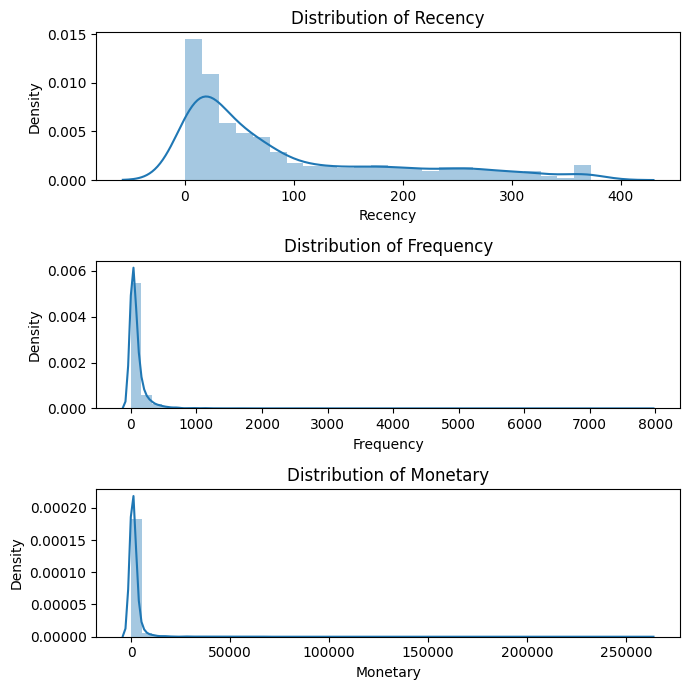

In [505]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

# Plot all 3 graphs together for summary findings
plt.figure(figsize=(7, 7))

plt.subplot(3, 1, 1)
check_skew(RFM_Table,'Recency')

plt.subplot(3, 1, 2)
check_skew(RFM_Table,'Frequency')

plt.subplot(3, 1, 3)
check_skew(RFM_Table,'Monetary')

plt.tight_layout()

In [506]:
# cols=['Recency','Frequency','Monetary_Value']
# df_rfm_log = RFM_Table[cols]
df_rfm_log = RFM_Table.copy()
df_rfm_log.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


Recency's: Skew: -0.4635591539552193, : SkewtestResult(statistic=-11.314301280234206, pvalue=1.114869536941138e-29)
Frequency's: Skew: -0.02600696239989871, : SkewtestResult(statistic=-0.6659021000684195, pvalue=0.5054736781086501)
Monetary's: Skew: 0.3694308288045071, : SkewtestResult(statistic=9.166088768517884, pvalue=4.904929990328552e-20)


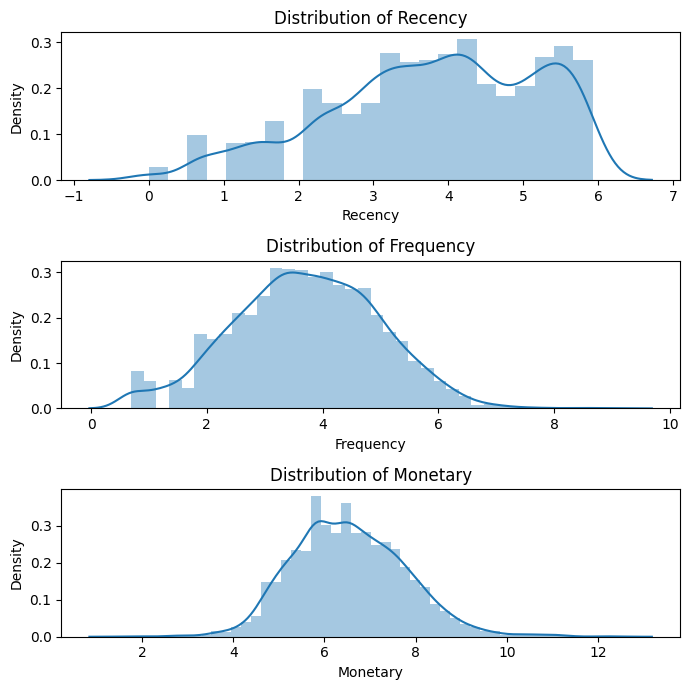

In [507]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(7, 7))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [508]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

df_rfm_log = windsoriser.transform(df_rfm_log)

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)

RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)
RFM_Table_scaled.head()

,CustomerID,Recency,Frequency,Monetary
0,-2.216570,1.465314,-2.075553,2.144184
1,-1.903521,-2.017962,0.758501,1.551863
2,-1.902753,-2.065658,2.072989,2.144184
3,-1.901985,-1.804222,1.296773,1.530119
4,-1.847594,-1.804222,0.305737,0.272403


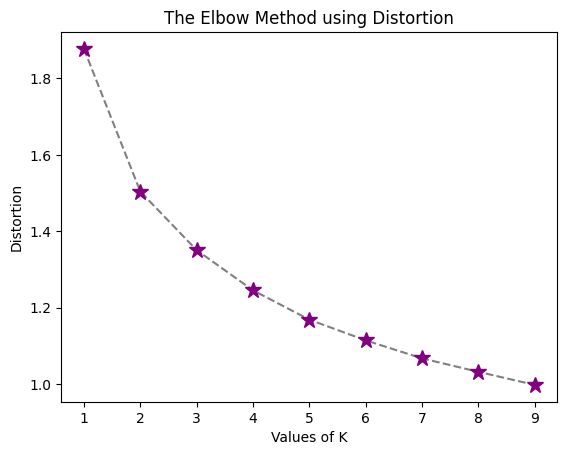

In [509]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


plt.plot(K, distortions, linestyle='--', color='grey')
plt.plot(K, distortions, marker='*', linestyle='None', color='purple', markersize=12)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()



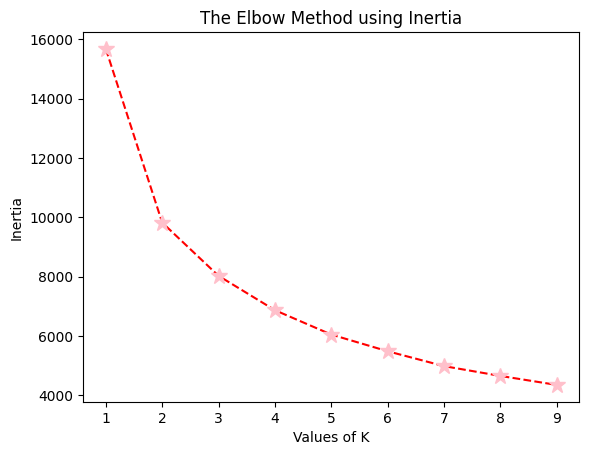

In [510]:
plt.plot(K, inertias, '*',linestyle='--', color='red') 
plt.plot(K, inertias, marker='*', linestyle='None', color='pink', markersize=12)
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [511]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_Table_scaled)


# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate Silhouette score
silhouette_avg = silhouette_score(RFM_Table_scaled, cluster_labels)
print("Silhouette Skoru:", silhouette_avg)

Silhouette Skoru: 0.2660922112842499


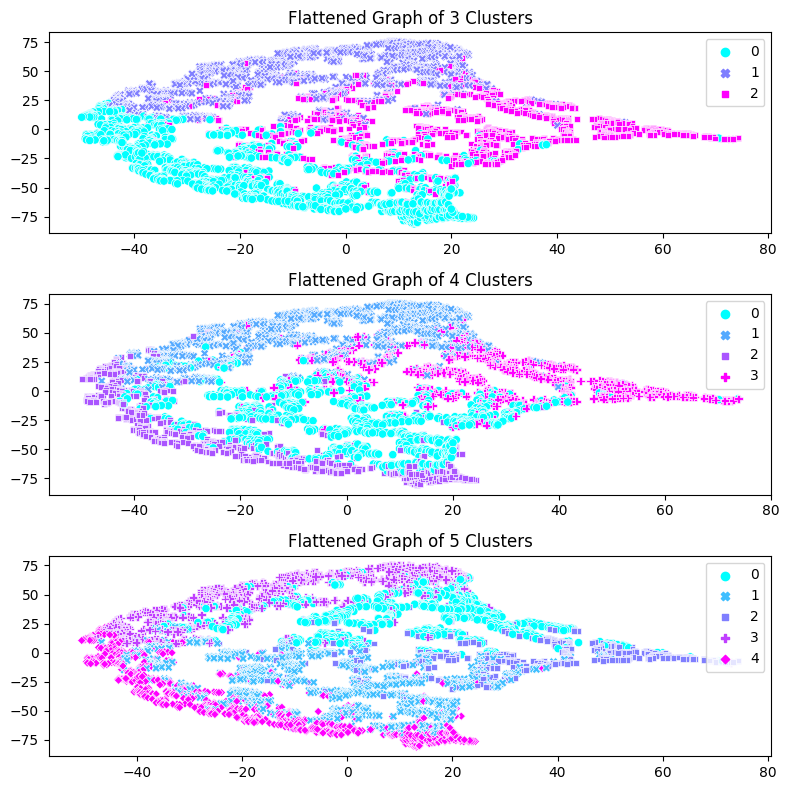

In [512]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette='cool')
    
    return df_new

plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, RFM_Table)

plt.tight_layout()

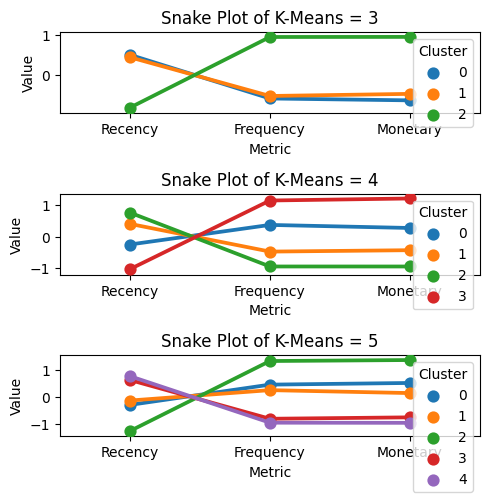

In [513]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

plt.figure(figsize=(5, 5))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

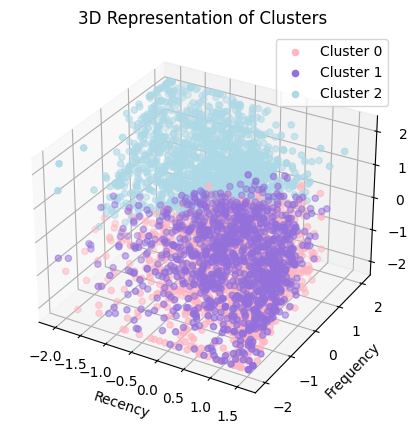

In [514]:
# K-means clustering
from sklearn.cluster import KMeans

# Create 3 clusters as an example
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_Table_scaled)
df_rfm_kmeans = kmeans.predict(RFM_Table_scaled)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

clusters = {
    0: RFM_Table_scaled[df_rfm_kmeans == 0],
    1: RFM_Table_scaled[df_rfm_kmeans == 1],
    2: RFM_Table_scaled[df_rfm_kmeans == 2]
}

colors = ['#FFB6C1', '#9370DB', '#ADD8E6']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i, (cluster, color, label) in enumerate(zip(clusters.values(), colors, labels)):
    ax.scatter(cluster['Recency'], cluster['Frequency'], cluster['Monetary'], c=color, label=label)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.title('3D Representation of Clusters')
plt.show()


In [515]:
low_recency_customers = segmented_rfm[segmented_rfm['Recency'] < 2]

# Find the time zone in which each customer with low Recency places the most orders
for index, customer in low_recency_customers.iterrows():
    customer_orders = df[df['CustomerID'] == customer['CustomerID']]
    orders_by_hour = customer_orders['InvoiceDate'].dt.hour.value_counts()

    if not orders_by_hour.empty:
        most_ordered_hour = orders_by_hour.idxmax()

        customer_orders_at_hour = customer_orders[customer_orders['InvoiceDate'].dt.hour == most_ordered_hour]

        if not customer_orders_at_hour.empty:
            print(f"Customer ID: {customer['CustomerID']} - Special offer for you: 10% discount! Sent at hour {most_ordered_hour}")
            # Sending e-mail or any other method of communication must take place here

Customer ID: 12748.0 - Special offer for you: 10% discount! Sent at hour 11
Customer ID: 12955.0 - Special offer for you: 10% discount! Sent at hour 10
Customer ID: 12985.0 - Special offer for you: 10% discount! Sent at hour 12
Customer ID: 13013.0 - Special offer for you: 10% discount! Sent at hour 12
Customer ID: 13026.0 - Special offer for you: 10% discount! Sent at hour 16
Customer ID: 13069.0 - Special offer for you: 10% discount! Sent at hour 11
Customer ID: 13077.0 - Special offer for you: 10% discount! Sent at hour 16
Customer ID: 13098.0 - Special offer for you: 10% discount! Sent at hour 10
Customer ID: 13102.0 - Special offer for you: 10% discount! Sent at hour 14
Customer ID: 13113.0 - Special offer for you: 10% discount! Sent at hour 13
Customer ID: 13263.0 - Special offer for you: 10% discount! Sent at hour 13
Customer ID: 13269.0 - Special offer for you: 10% discount! Sent at hour 12
Customer ID: 13298.0 - Special offer for you: 10% discount! Sent at hour 13
Customer ID:

In [516]:
segmented_rfm['Segment_Type']='Bronze'

# Identifying 'Gold' customers
gold_condition = (segmented_rfm['RFM_Score'] >= 8) # Condition to determine gold customers
segmented_rfm.loc[gold_condition, 'Segment_Type'] = 'Gold' # Mark Gold customers as 'Gold' in the 'Segment_Type' column

# Identify 'Silver' customers
silver_condition = ((segmented_rfm['RFM_Score'] >= 6) & (segmented_rfm['RFM_Score'] < 8)) # Condition to determine silver customers
segmented_rfm.loc[silver_condition, 'Segment_Type'] = 'Silver' # Mark Silver customers as 'Silver' in the 'Segment_Type' column

# Identify 'Bronze' customers
bronze_condition = ((segmented_rfm['RFM_Score'] >= 2) & (segmented_rfm['RFM_Score'] < 5)) # Condition to determine bronze customers
segmented_rfm.loc[bronze_condition, 'Segment_Type'] = 'Bronze' # Mark Bronze customers as 'Bronze' in the 'Segment_Type' column

segmented_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM,RFM_Score,RFM_Segment,Segment_Type
0,12346.0,325,1,77183.60,4,4,1,44,8,loyal_customers,Gold
1,12747.0,2,103,4196.01,1,1,1,11,2,hibernating,Bronze
2,12748.0,0,4595,33719.73,1,1,1,11,2,hibernating,Bronze
3,12749.0,3,199,4090.88,1,1,1,11,2,hibernating,Bronze
4,12820.0,3,59,942.34,1,2,2,12,3,hibernating,Bronze
5,12821.0,214,6,92.72,4,4,4,44,8,loyal_customers,Gold
6,12822.0,70,46,948.88,3,2,2,32,5,about_to_sleep,Bronze
7,12823.0,74,5,1759.50,3,4,1,34,7,loyal_customers,Silver
8,12824.0,59,25,397.12,3,3,3,33,6,need_attention,Silver
9,12826.0,2,91,1474.72,1,2,2,12,3,hibernating,Bronze


In [517]:
# Reward function
def offer_rewards(segment):
    if segment == 'Gold':
        return 'Special gift and 15% discount!'
    elif segment == 'Silver':
        return 'Coupon and 10% discount!'
    else:
        return 'Thank you!'

# Application of rewards for each segment
for segment in segmented_rfm['Segment_Type'].unique():
    customers = segmented_rfm[segmented_rfm['Segment_Type'] == segment]
    print(f"\n{segment} To customers in the segment:")
    print(f"Special gift: {offer_rewards(segment)}")
    print(f"{len(customers)} special reward is offered to the customer.\n")



Gold To customers in the segment:
Special gift: Special gift and 15% discount!
478 special reward is offered to the customer.


Bronze To customers in the segment:
Special gift: Thank you!
2254 special reward is offered to the customer.


Silver To customers in the segment:
Special gift: Coupon and 10% discount!
1188 special reward is offered to the customer.

